<a href="https://colab.research.google.com/github/suhailnajeeb/ete-ice-399/blob/master/Experiment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment No 4: Frequency & Phase Modulation (FM, PM)

In [0]:
import numpy as np
from math import pi
from numpy import cos, absolute
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

## FM Modulation

In [0]:
fs = 8000
fc = 100
Ac = 1
fm = 5
Am = 1
kf = 100*pi

In [0]:
t = np.arange(0,1,1/fs)
M = Am*cos(2*pi*fm*t)
C = Ac*cos(2*pi*fc*t)

In [0]:
#M_int = np.zeros((1,len(t)))
M_int = []
for i in range(len(t)):
  M_int.append(0.5*(1/fs)*(2*np.sum(M[:i]-M[0]-M[i])))

M_int = np.asarray(M_int)

In [0]:
s_FM = Ac*cos(2*pi*fc*t + kf*M_int)

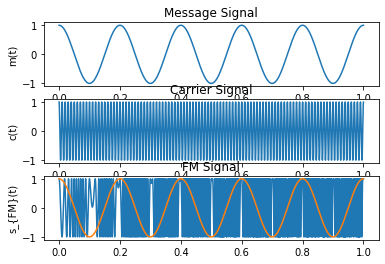

In [42]:
fig, axs = plt.subplots(3,1)

axs[0].plot(t,M)
axs[0].set(ylabel = 'm(t)')
axs[0].set_title('Message Signal')

axs[1].plot(t,C)
axs[1].set(ylabel = 'c(t)')
axs[1].set_title('Carrier Signal')

axs[2].plot(t,s_FM,t,M)
axs[2].set(ylabel ='s_{FM}(t)')
axs[2].set_title('FM Signal')

plt.show()

In [0]:
M_f = fftshift(absolute(fft(M)))
f = np.linspace(-fs/2, fs/2, len(M_f))

In [0]:
C_f = fftshift(absolute(fft(C)))

In [0]:
S_FM_f = fftshift(absolute(fft(s_FM)))
beta = (kf*Am/(2*pi))/fm
BW = 2*fm*(beta+1)

BW_bound = np.zeros(len(f))
for i in range(len(f)):
  if(abs(f[i])<(fc + BW/2) and abs(f[i]>(fc - BW/2))):
    BW_bound[i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individu

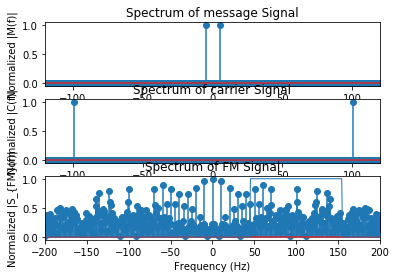

In [70]:
fig, axs = plt.subplots(3,1)

axs[0].stem(f, M_f/M_f.max())
axs[0].set(xlabel = 'Frequency (Hz)', ylabel = 'Normalized |M(f)|', xlim = (-110,110))
axs[0].set_title('Spectrum of message Signal')

axs[1].stem(f, C_f/C_f.max())
axs[1].set(xlabel = 'Frequency (Hz)', ylabel = 'Normalized |C(f)|', xlim = (-110,110))
axs[1].set_title('Spectrum of carrier Signal')

axs[2].stem(f, S_FM_f/S_FM_f.max())
axs[2].plot(f, BW_bound, linewidth = 1)
axs[2].set(xlabel = 'Frequency (Hz)', ylabel = 'Normalized |S_{FM}(f)|', xlim = (-200,200))
axs[2].set_title('Spectrum of FM Signal')

plt.show()